In [251]:
%store -r __toolboxforsalesdata

In [8]:
__toolboxforsalesdata

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [9]:
df = pd.read_csv('checkkk.csv')

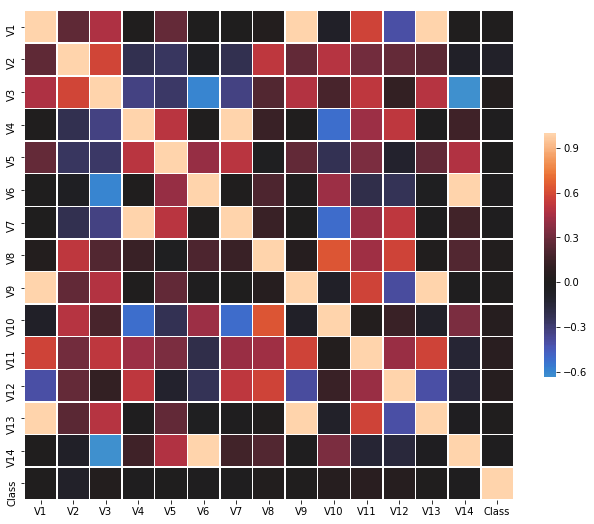

In [11]:
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": 0.5})

In [12]:
df_good = pd.read_csv('Click_prediction_small.csv')

In [14]:
len(np.unique(df_good['url_hash']))

15787

In [25]:
df_good.head()

,click,impression,url_hash,ad_id,advertiser_id,depth,position,query_id,keyword_id,title_id,description_id,user_id
0,0,1,1.071003e+19,8343295,11700,3,3,7702266,21264,27892,1559,0
1,1,1,1.736385e+19,20017077,23798,1,1,93079,35498,4,36476,562934
2,0,1,8.915473e+18,21348354,36654,1,1,10981,19975,36105,33292,11621116
3,0,1,4.426693e+18,20366086,33280,3,3,0,5942,4057,4390,8778348
4,0,1,1.157260e+19,6803526,10790,2,1,9881978,60593,25242,1679,12118311


In [26]:
tech_full = df_good.copy()

In [66]:
max(tech_full_shuff['impression'])

11820

In [27]:
tech_full.head()

,click,impression,url_hash,ad_id,advertiser_id,depth,position,query_id,keyword_id,title_id,description_id,user_id
0,0,1,1.071003e+19,8343295,11700,3,3,7702266,21264,27892,1559,0
1,1,1,1.736385e+19,20017077,23798,1,1,93079,35498,4,36476,562934
2,0,1,8.915473e+18,21348354,36654,1,1,10981,19975,36105,33292,11621116
3,0,1,4.426693e+18,20366086,33280,3,3,0,5942,4057,4390,8778348
4,0,1,1.157260e+19,6803526,10790,2,1,9881978,60593,25242,1679,12118311


In [28]:
from sklearn.utils import shuffle

In [29]:
np.random.seed(333)

In [30]:
random.seed(333)

In [31]:
tech_full = shuffle(tech_full)

In [33]:
tech_full_shuff = tech_full.copy()

In [34]:
tech_full_shuff.reset_index(inplace = True)

In [36]:
tech_full_shuff.drop('index', axis = 1, inplace = True)

299611.5

In [52]:
tech_full_shuff_train = tech_full_shuff.copy()[0:int(0.75*len(tech_full_shuff))]

In [53]:
tech_full_shuff_test = tech_full_shuff.copy()[int(0.75*len(tech_full_shuff)):]

In [58]:
sum(tech_full_shuff_train['click'] == 1)/len(tech_full_shuff_train)

0.16744712310295684

In [41]:
len(tech_full_shuff_train)

0

In [61]:
sum(tech_full_shuff_test['click'] == 1)/len(tech_full_shuff_test)

0.16941854992940894

In [64]:
len(tech_full_shuff_train)

299611

In [65]:
len(tech_full_shuff_test)

99871

In [85]:
tech_full_shuff.groupby(['user_id','ad_id'])['click'].mean().reset_index()

,user_id,ad_id,click
0,0,1000471,0.000000
1,0,1000515,0.000000
2,0,1000699,0.200000
3,0,1000750,0.000000
4,0,1000762,0.000000
5,0,1000806,0.000000
6,0,1000808,1.000000
7,0,1000826,0.000000
8,0,1000827,1.000000
9,0,1000829,0.000000


In [86]:
len(tech_full_shuff)

399482

In [73]:
tech_full_shuff[tech_full_shuff['impression']>3]

,click,impression,url_hash,ad_id,advertiser_id,depth,position,query_id,keyword_id,title_id,description_id,user_id
64,0,4,5.260594e+16,3048011,23782,1,1,23163213,1068,695,215,2103280
86,1,4,8.802768e+18,21644424,26278,1,1,16893300,16992,12647,12506,21686542
118,0,4,2.434756e+18,21173643,29273,1,1,3405,7083,98,69,106093
155,0,4,1.654415e+19,4321008,17243,2,2,49883,24328,604991,296601,191
171,1,6,1.205788e+19,20164344,27961,3,3,599848,9584,128012,122657,0
185,1,4,7.143519e+18,20393504,33093,2,1,4519,320,133,1331,6722541
202,0,6,1.186437e+19,4349344,819,2,1,98935,78935,102056,84770,1633730
212,0,4,5.208883e+18,22111542,37818,3,2,72701,3014,1916,2161,0
253,0,8,1.205788e+19,20192679,27961,1,1,755361,20198,36130,35560,0
254,0,19,1.741297e+19,4260538,2105,2,1,119481,12119,37882,30621,102296


In [182]:
final_df = pd.read_csv('BNG_heart-statlog.csv')

In [181]:
final_df.head()

,age,sex,chest,resting_blood_pressure,serum_cholestoral,fasting_blood_sugar,resting_electrocardiographic_results,maximum_heart_rate_achieved,exercise_induced_angina,oldpeak,slope,number_of_major_vessels,thal,class
0,53.494725,1,1.150395,117.978412,242.009370,0,0,133.361344,0,3.089391,2,1,3,1
1,37.320375,0,1.887693,118.455670,218.156844,1,2,148.458625,0,0.000000,3,0,3,0
2,48.520214,1,3.000000,141.819366,173.382704,0,2,141.198191,0,1.071691,2,0,6,0
3,59.587959,0,4.000000,106.368725,222.732859,0,2,141.659888,1,0.866638,2,0,7,1
4,58.805677,1,3.000000,121.035286,257.257441,0,0,145.333117,0,1.212600,3,0,7,0


In [184]:
final_df.loc[final_df['class'] == 'present', 'class'] = 1

In [185]:
final_df.loc[final_df['class'] == 'absent', 'class'] = 0

In [186]:
final_df.head()

,age,sex,chest,resting_blood_pressure,serum_cholestoral,fasting_blood_sugar,resting_electrocardiographic_results,maximum_heart_rate_achieved,exercise_induced_angina,oldpeak,slope,number_of_major_vessels,thal,class
0,53.494725,1,1.150395,117.978412,242.009370,0,0,133.361344,0,3.089391,2,1,3,1
1,37.320375,0,1.887693,118.455670,218.156844,1,2,148.458625,0,0.000000,3,0,3,0
2,48.520214,1,3.000000,141.819366,173.382704,0,2,141.198191,0,1.071691,2,0,6,0
3,59.587959,0,4.000000,106.368725,222.732859,0,2,141.659888,1,0.866638,2,0,7,1
4,58.805677,1,3.000000,121.035286,257.257441,0,0,145.333117,0,1.212600,3,0,7,0


In [187]:
final_df['class'] = final_df['class'].astype('int64')

In [188]:
final_df.dtypes

age                                     float64
sex                                       int64
chest                                   float64
resting_blood_pressure                  float64
serum_cholestoral                       float64
fasting_blood_sugar                       int64
resting_electrocardiographic_results      int64
maximum_heart_rate_achieved             float64
exercise_induced_angina                   int64
oldpeak                                 float64
slope                                     int64
number_of_major_vessels                   int64
thal                                      int64
class                                     int64
dtype: object

In [189]:
final_full_shuff = final_df.copy()

In [190]:
final_full_shuff = shuffle(final_full_shuff)

In [191]:
final_full_shuff.reset_index(inplace = True)
final_full_shuff.drop('index', axis =1 , inplace = True)

In [192]:
final_full_shuff.head()

,age,sex,chest,resting_blood_pressure,serum_cholestoral,fasting_blood_sugar,resting_electrocardiographic_results,maximum_heart_rate_achieved,exercise_induced_angina,oldpeak,slope,number_of_major_vessels,thal,class
0,49.207124,0,4.000000,162.996167,181.108682,0,0,148.227858,1,0.944547,2,0,3,1
1,53.628425,1,1.741596,130.233730,276.474630,0,2,152.917139,0,0.119070,2,0,3,0
2,49.591426,1,4.000000,146.999012,223.300517,1,2,102.352090,1,1.616747,2,2,7,1
3,58.991445,1,4.000000,112.369143,187.245501,0,0,158.164750,1,0.000000,1,1,7,1
4,51.053602,1,1.954609,138.032047,238.482868,0,0,172.540828,0,1.150464,1,1,3,0


In [193]:
final_full_shuff['ID'] = final_full_shuff.index

In [194]:
final_train = final_full_shuff.copy()[0:int(0.6*len(final_full_shuff))]

In [195]:
final_test = final_full_shuff.copy()[int(0.6*len(final_full_shuff)):]

In [196]:
len(final_train)+len(final_test) == len(final_full_shuff)

True

In [198]:
sum(final_train['class'] == 1)/len(final_train)

0.444185

In [199]:
sum(final_test['class'] == 1)/len(final_test)

0.4438575

In [200]:
cols = final_train.columns.values

In [201]:
cols

array(['age', 'sex', 'chest', 'resting_blood_pressure',
       'serum_cholestoral', 'fasting_blood_sugar',
       'resting_electrocardiographic_results',
       'maximum_heart_rate_achieved', 'exercise_induced_angina',
       'oldpeak', 'slope', 'number_of_major_vessels', 'thal', 'class',
       'ID'], dtype=object)

In [202]:
cols = cols[0:-1]

In [203]:
cols = list(cols)
cols

['age',
 'sex',
 'chest',
 'resting_blood_pressure',
 'serum_cholestoral',
 'fasting_blood_sugar',
 'resting_electrocardiographic_results',
 'maximum_heart_rate_achieved',
 'exercise_induced_angina',
 'oldpeak',
 'slope',
 'number_of_major_vessels',
 'thal',
 'class']

In [204]:
cols = ['ID'] + cols

In [205]:
cols = np.array(cols)

In [206]:
cols

array(['ID', 'age', 'sex', 'chest', 'resting_blood_pressure',
       'serum_cholestoral', 'fasting_blood_sugar',
       'resting_electrocardiographic_results',
       'maximum_heart_rate_achieved', 'exercise_induced_angina',
       'oldpeak', 'slope', 'number_of_major_vessels', 'thal', 'class'],
      dtype='<U36')

In [207]:
final_train = final_train[cols]

In [208]:
final_test = final_test[cols]

In [209]:
X_test = final_test.copy().drop('class', axis = 1)

In [210]:
X_test.head()

,ID,age,sex,chest,resting_blood_pressure,serum_cholestoral,fasting_blood_sugar,resting_electrocardiographic_results,maximum_heart_rate_achieved,exercise_induced_angina,oldpeak,slope,number_of_major_vessels,thal
600000,600000,53.963191,1,4.000000,136.940829,236.862814,0,2,143.961525,1,0.711100,1,2,7
600001,600001,49.621479,1,4.000000,122.024651,226.593019,0,2,112.220874,1,0.000000,1,1,7
600002,600002,36.933893,1,1.300924,127.585643,351.061046,0,0,177.945922,0,0.313078,1,0,7
600003,600003,54.884588,1,3.000000,124.876745,250.370530,0,0,153.176526,0,0.308277,1,1,7
600004,600004,71.016392,0,1.746972,120.922600,210.979710,0,0,164.573122,0,1.021370,1,1,3


In [211]:
len(final_train.columns)

15

In [212]:
len(X_test.columns)

14

In [223]:
X_test.to_csv('test.csv', index = False)

In [224]:
final_train.to_csv('train.csv', index = False)

In [215]:
np.sum(pd.isnull(final_train),axis = 0)

ID                                      0
age                                     0
sex                                     0
chest                                   0
resting_blood_pressure                  0
serum_cholestoral                       0
fasting_blood_sugar                     0
resting_electrocardiographic_results    0
maximum_heart_rate_achieved             0
exercise_induced_angina                 0
oldpeak                                 0
slope                                   0
number_of_major_vessels                 0
thal                                    0
class                                   0
dtype: int64

(600000, 15)

In [222]:
tech_solution.to_csv('tech_solution.csv', index = False)

In [220]:
sample_solution = pd.DataFrame({'ID':X_test['ID'], 'class' : [0]*len(X_test)})

In [221]:
sample_solution.to_csv('sample_submission.csv', index = False)

In [246]:
tp_solution1 = pd.DataFrame({'ID':X_test['ID'][0:int(0.2*len(X_test))], 'class' : [1]*int(0.2*len(X_test))})

In [247]:
tp_solution2 = pd.DataFrame({'ID':X_test['ID'][int(0.2*len(X_test)):], 'class' : [0]*int(0.8*len(X_test))})

In [248]:
tp_solution = pd.concat([tp_solution1,tp_solution2], axis = 0)

In [249]:
tp_solution.to_csv('tp_solution.csv', index=False)

In [245]:
tp_solution.shape

(400000, 2)